## Bootstrapping

### Load libraries

In [1]:
library(ggplot2)
library(reshape2) 
library(repr)

In [2]:
# define a function that generates sample indixes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

#### KNN Regressor

In [3]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    testLabel <- rep(0.0, test.len)
    for (i in 1:test.len){
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        testLabel[i]<- (mean(train.label[nn]))
    }
    return (testLabel)
}

**Apply your bootstrapping for KNN regression with times = 50 (the number of subsets), size = 60 (the size of each subset), and change K=1,.., 15 (the neighbourhood size).**

#### Load train test data

In [4]:
#read data from csv file
train_data <- read.csv('Data//1B_train.csv')
test_data <- read.csv('Data//1B_test.csv')

# training data and labels
train.data <- train_data[, -5] # grab all records, leave out the last column
train.label <- train_data[, 5]

# testing data and labels
test.data <- test_data[, -5] # grab all records, leave out last column
test.label <- test_data[, 5]

In [5]:
K <- 15 # Maximum K for KNN 
L <- 50 # number of datasets
N <- 60 # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the error metric
sq_error <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        sq_error[i,'K'] <- k
        sq_error[i,'L'] <- l
        
        #### calculate and record the train and test average sum of square error rates
        sq_error[i,'test'] <-  sum((knn(train.data[indx,], train.label[indx], test.data, K=k) - test.label)^2)/nrow(test.data)
    } 
}

#### Boxplot where the x-axis is K, and the y-axis is the average test error (and the uncertainty around it) corresponding to each K

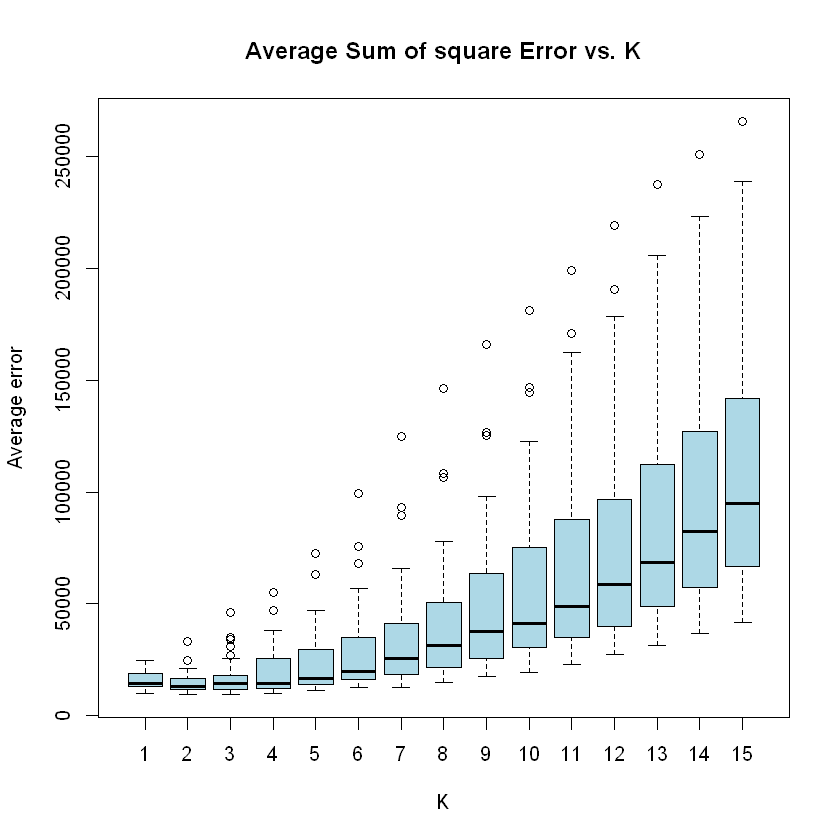

In [6]:
# Box plot for average error
boxplot(test~K, 
        data=sq_error, 
        main="Average Sum of square Error vs. K", 
        xlab="K", 
        ylab="Average error",
        col="#add8e6")

We can see from the plot that test error decreases till k=2 where it is minimum then it increases with the increase in value of K. Also, the uncertainity around the average error increases with the increase in value of K.

**Apply your bootstrapping for KNN regression with K=10(the neighbourhood size), size = 40 (the size of each subset), and change times = 10, 20, 30,.., 200 (the number of subsets).**

In [7]:
x <- data.frame('times'=numeric(), 'L'=numeric(), 'test'=numeric())

In [8]:
time <- c(10,20)

for (i in time) {
    x <- rbind(x, data.frame('times'=i, 'L'=seq(1:i), 'test'=rep(0,i)))
}

In [9]:
x[which(x$times == 10 & x$L==2),'test'] = 5

In [10]:
K <- 10 #  Neighbours size K for KNN 
N <- 40 # size of datasets
times <- (1:20)*10 # number of datasets

# a dataframe to track the error metric
sq_error <- data.frame('times'=numeric(), 'L'=numeric(), 'test'=numeric())

for (i in times) {
    sq_error <- rbind(sq_error, data.frame('times'=i, 'L'=seq(1:i), 'test'=rep(0,i)))
}

for (L in times){
    # generate bootstrap indices:
    boot.indx <- boot(nrow(train.data), N, L)
    
    temp_error <- rep(0,L)
    
    ### for every subset:
    for (l in 1:L){

        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]

        test.preds <- knn(train.data[indx,], train.label[indx], test.data, K=K)
        
        #### calculate and record the train and test average sum of square error rates
        sq_error[which(sq_error$times == L & sq_error$L==l),'test'] <-  sum((test.preds - test.label)^2)/nrow(test.data)
    }
}

In [11]:
# Calculating average error
sq_error[,'test'] <- sq_error[,'test']/sq_error[,'times']

#### Boxplot of average errors vs times

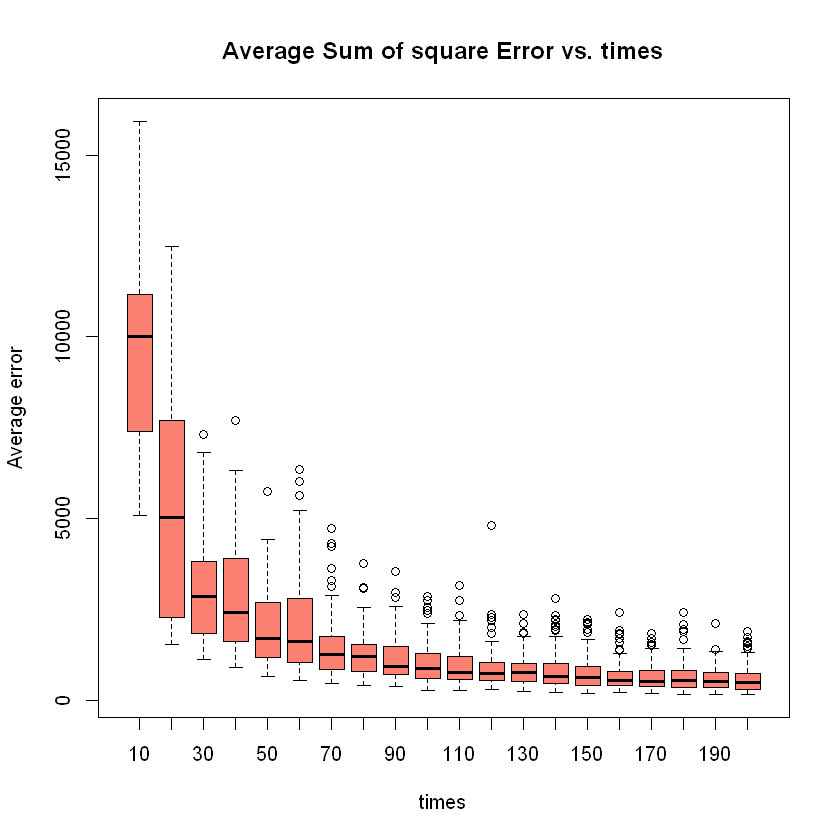

In [12]:
boxplot(test~times, 
        data=sq_error, 
        main="Average Sum of square Error vs. times", 
        xlab="times", 
        ylab="Average error",
        col="salmon")

As the number of datasets increases for the fixed value of k=10 and dataset_size=40, we see that average test error decreases. Also, uncertainity in the error decreases with the increase in number of boostrapped subsets.
